## imports

In [2]:
import json
import gzip
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from random import sample

import matplotlib.pyplot as plt
%matplotlib inline

## load sample

In [3]:
data = []
with open('sample.json') as f:
  for line in f.readlines():
    data.append(json.loads(line))

In [4]:
df = json_normalize(data)

In [5]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600


## load review data

In [6]:
data = []
with gzip.open('Video_Games_5.json.gz','rt') as f:
  for line in f:
    data.append(json.loads(line))

In [7]:
len(data)

497577

In [8]:
df = json_normalize(data)

In [9]:
df.head(10)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,style.Package Type:,style.Package Quantity:,style.Item Package Quantity:,style.Pattern:,style.Platform for Display:,style.Style Name:,style.Denomination:,style.Offer Type:,style.Configuration:,style.Color Name:
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,True,"11 13, 2014",A11V6ZJ2FVQY1D,0700026657,IBRAHIM ALBADI,i liked a lot some time that i haven't play a ...,Anno 2070,1415836800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,False,"08 2, 2014",A1KXJ1ELZIU05C,0700026657,Creation27,"I'm an avid gamer, but Anno 2070 is an INSULT ...",Avoid This Game - Filled with Bugs,1406937600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,True,"03 3, 2014",A1WK5I4874S3O2,0700026657,WhiteSkull,I bought this game thinking it would be pretty...,A very good game balance of skill with depth o...,1393804800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,True,"02 21, 2014",AV969NA4CBP10,0700026657,Travis B. Moore,I have played the old anno 1701 AND 1503. thi...,Anno 2070 more like anno 1701,1392940800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.0,True,"06 27, 2013",A1EO9BFUHTGWKZ,0700026657,johnnyz3,"I liked it and had fun with it, played for a w...",Pretty fun,1372291200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df['overall'].describe()

count    497577.000000
mean          4.220456
std           1.185424
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

## Plot of product ratings

In [41]:
df['overall'].value_counts()

5.0    299759
4.0     93654
3.0     49146
1.0     30883
2.0     24135
Name: overall, dtype: int64

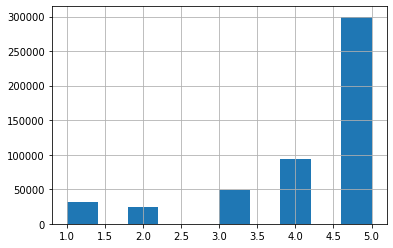

In [40]:
df['overall'].hist()

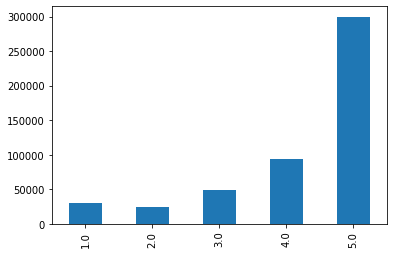

In [11]:
df['overall'].value_counts().sort_index().plot(kind='bar')

## Sampling the reviews

In [12]:
df.shape

(497577, 30)

In [13]:
rows_total = df.shape[0]

Get 3 random reviews

In [26]:
idx = [np.random.randint(1, rows_total) for _ in range(3)]
for i in idx:
  print(f"- item {i}:")
  print("review:", df.loc[i].reviewText)
  print("rating:", df.loc[i].overall)
  print("\n")

- item 302700:
review: ;)
rating: 5.0


- item 27101:
review: BRUTE FORCE SHOULD NOT BE TAKEN LIGHTLY. I KNOW HALO IS AWSOME AND EVERYTHING BUT BRUTE FORCE IS GOING TO TO TAKE HALO OVER THE EDGE. THE GAME THAT CRAWLS BACK ON TOP WILL BE THE ONE THAT IS MORE INTENSE AND REQUIRES MORE FORCE AND SKILL TO PLAY. I'M GOING TO GO WITH BRUTE FORCE. IF BUNGIE IS GOING TO HAVE A CHANCE AGAINST BRUTE FORCE THEY BETTER SEE WHAT ELSE THE XBOX HAS THAT THEY DIDN'T USE BEFORE.
rating: 5.0


- item 143515:
review: I rented this game because I was on the fence about buying it. I really liked it right away, it is a unique idea and I like the execution. The Graphics are awesome and the enemies are pretty cool. There are alot of guns but this seem to be somewhat of a gimmick, chances are you use the ones you like and ignore the rest.

That being said if you don't like RPGs or "grinding" for loot, this game will bore you. There is not a whole lot of variety to be had or a thriving story line. It is however

## Prepare training data

### 1. Sampling 1500/500/500/500/1500 reviews for ratings 1->5 

In [60]:
def sample_rating(rating, size):
    dfsub = df.loc[df['overall']==rating]
    idx = dfsub.index.tolist()
    sample_idx = sample(idx, size)
    return df.iloc[sample_idx]

Sample reviews for all ratings and save to file

In [105]:
rating_sample_size = {
    1.0: 1500,
    2.0: 500,
    3.0: 500,
    4.0: 500,
    5.0: 1500,
}

for rating, size in rating_sample_size.items():
    print("sample {} samples for rating {}".format(size, rating))
    dfsample = sample_rating(rating, size)
    print(dfsample.head()[['reviewText', 'overall']])
    print("\n\n")
    
    # https://pandas.pydata.org/pandas-docs/version/0.21.1/generated/pandas.DataFrame.to_csv.html
    dfsample.to_csv(
        "data/small_rating_{}.csv".format(int(rating)),
        index=False,
        columns=['reviewText', 'overall'])

sample 1500 samples for rating 1.0
                                               reviewText  overall
287395  The game is great, 5 stars, but anyone paying ...      1.0
439779  We had this on pre-order for 2 years. Forza 5 ...      1.0
493462  Despite my having a high-powered PC, the game ...      1.0
455382  No Yao Ming, Michael Redd, Tayshaun Prince etc...      1.0
27177   Love this game series. Love playing GTA Libert...      1.0



sample 500 samples for rating 2.0
                                               reviewText  overall
89708   I owned this game for a total of one day befor...      2.0
113418  The fun part about this game is beating up the...      2.0
194495  Grapple is a joke to use.  Half the game is ba...      2.0
242888  It was a little better than the other two, but...      2.0
339892  Basically, It's one mission in an episodic sto...      2.0



sample 500 samples for rating 3.0
                                               reviewText  overall
241288  I tried this

### 2. Sample 100,000 reviews

In [97]:
def sample_reviews(size):
    rows_total = df.shape[0]
    # sample without replacement
    idx = sample(range(0, rows_total), size)
    return df.iloc[idx]

In [106]:
df1 = sample_reviews(100000)
print(df1[['reviewText', 'overall']].head())
df1.to_csv(
        "data/big_rating_all.csv",
        index=False,
        columns=['reviewText', 'overall'])

                                               reviewText  overall
18934   I like RPGs.  I like D&D.  This game, however,...      3.0
120758  I wasn't to sure about having things laid out ...      5.0
401681                                            genial!      4.0
193497  The games are very well adjusted to Wii contro...      4.0
143626  I initially played Civilization on the PC a co...      4.0
